In [130]:
'''
from astropy.io import fits

import numpy.ma as ma

import matplotlib.pyplot as plt
'''
from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import numpy as np

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from mapSmoothness_functions import how_smooth

## Import galaxy data

In [499]:
galaxy_ID = '8713-3702'
#plate, fiber = galaxy_ID.split('-')

image = Image(plateifu=galaxy_ID)
maps = Maps(plateifu=galaxy_ID)
'''
galaxy_data = fits.open('../manga_files/MaNGA_DR15/' + plate + '/manga-' + galaxy_ID + '.Pipe3D.cube.fits.gz')

#print(galaxy_data[3].data[103])

# Extract H-alpha velocity map (NAME102)
Ha_vel = galaxy_data[3].data[102]
'''

/anaconda/envs/python3/lib/python3.6/site-packages/marvin/utils/general/general.py:929: MarvinUserWarning: drpall file not found. Downloading it.
  warnings.warn('drpall file not found. Downloading it.', MarvinUserWarning)


SDSS_ACCESS> syncing... please wait
SDSS_ACCESS> Done!


/anaconda/envs/python3/lib/python3.6/site-packages/marvin/utils/general/general.py:1695: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/sdss_access/20190607_099/sdss_access_00.err' mode='w' encoding='UTF-8'>
  get_drpall_file(drpall=drpall, drpver=drpver)


"\ngalaxy_data = fits.open('../manga_files/MaNGA_DR15/' + plate + '/manga-' + galaxy_ID + '.Pipe3D.cube.fits.gz')\n\n#print(galaxy_data[3].data[103])\n\n# Extract H-alpha velocity map (NAME102)\nHa_vel = galaxy_data[3].data[102]\n"

## Mask "bad" data

In [146]:
'''
mHa_vel = ma.masked_equal(Ha_vel, 0)

mHa_vel0 = mHa_vel - 13900
'''

'\nmHa_vel = ma.masked_equal(Ha_vel, 0)\n\nmHa_vel0 = mHa_vel - 13900\n'

## Plot velocity map

'\nplt.figure()\nplt.imshow(Ha_vel)\nplt.colorbar()\nplt.show()\n'

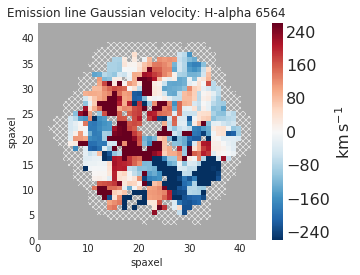

In [500]:
ha_vel = maps.emline_gval_ha_6564
ha_vel.plot()
'''
plt.figure()
plt.imshow(Ha_vel)
plt.colorbar()
plt.show()
'''

## Smoothness score

In [501]:
map_mask = ha_vel.mask

mask = np.zeros(ha_vel.shape, dtype=np.uint8)

mask[map_mask > 10000] = 1


score = how_smooth( ha_vel, mask)

print(score)

2.4636160014115434


/anaconda/envs/python3/lib/python3.6/site-packages/marvin/tools/quantities/map.py:400: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / ((1. / ivar1 + 1. / ivar2))


## Display color image

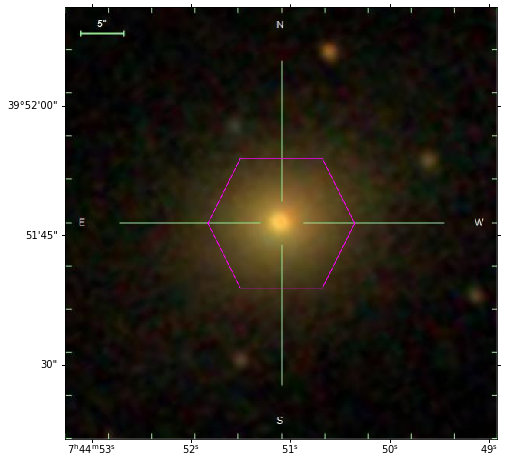

In [502]:
'''
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, map_ in zip(axes, [image, ha_vel]):
    mapplot.plot(dapmap=map_, fig=fig, ax=ax)
    
fig.tight_layout()
'''
image.plot()